In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder




In [38]:
df=pd.read_csv("C:/Users/varsh/Downloads/archive (1)\IRIS.csv")


<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\varsh\AppData\Local\Temp\ipykernel_20012\2851805985.py:1: SyntaxWarning: invalid escape sequence '\I'
  df=pd.read_csv("C:/Users/varsh/Downloads/archive (1)\IRIS.csv")


In [39]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
print("total_columns = ",df.shape[0])
print("Null values:\n", df.isnull().sum())
print("Duplicated values:", df.duplicated().sum())

total_columns =  150
Null values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Duplicated values: 3


In [41]:
df=df.drop_duplicates()
print("Duplicates removed. Remaining rows:", df.shape[0])
df.head()

Duplicates removed. Remaining rows: 147


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
X=df[["sepal_length","sepal_width","petal_length","petal_width"]]
y=df["species"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

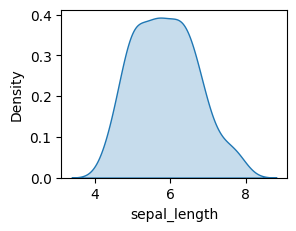

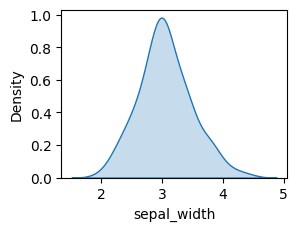

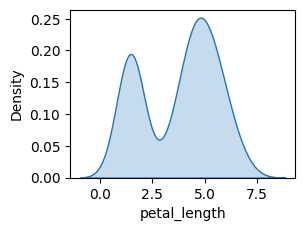

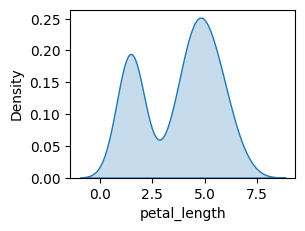

In [43]:


plt.subplot(2, 2, 1) #plt.subplot(rows, columns, plot_number)(left)
sns.kdeplot(df['sepal_length'], fill=True)
plt.show()


plt.subplot(2, 2, 3)  # 1 row, 2 columns, plot 2(right)
sns.kdeplot(df['sepal_width'], fill=True)
plt.show()


plt.subplot(2, 2, 2)  # Bottom-Left
sns.kdeplot(df['petal_length'], fill=True)
plt.show()


plt.subplot(2, 2, 4)  # Bottom-Right
sns.kdeplot(df['petal_length'], fill=True)

plt.show()


In [44]:
cm=confusion_matrix(y_test, y_pred)            #A confusion matrix is a table that shows the number of: TP,TN,FP,FN
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

NameError: name 'iris' is not defined

In [ ]:
sample=[[6.5, 3.0, 5.5, 2.0]] # Prediction for given input
sample_scaled=scaler.transform(sample)
predicted_class=svm.predict(sample_scaled)

# Directly take the predicted label
predicted_label=predicted_class[0]

print(f"\nPrediction for input {sample}: {predicted_label}")



Prediction for input [[6.5, 3.0, 5.5, 2.0]]: Iris-virginica


d:\AIWORKFORCE\PROJECT 7(DESICION TREE ,SVM)\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


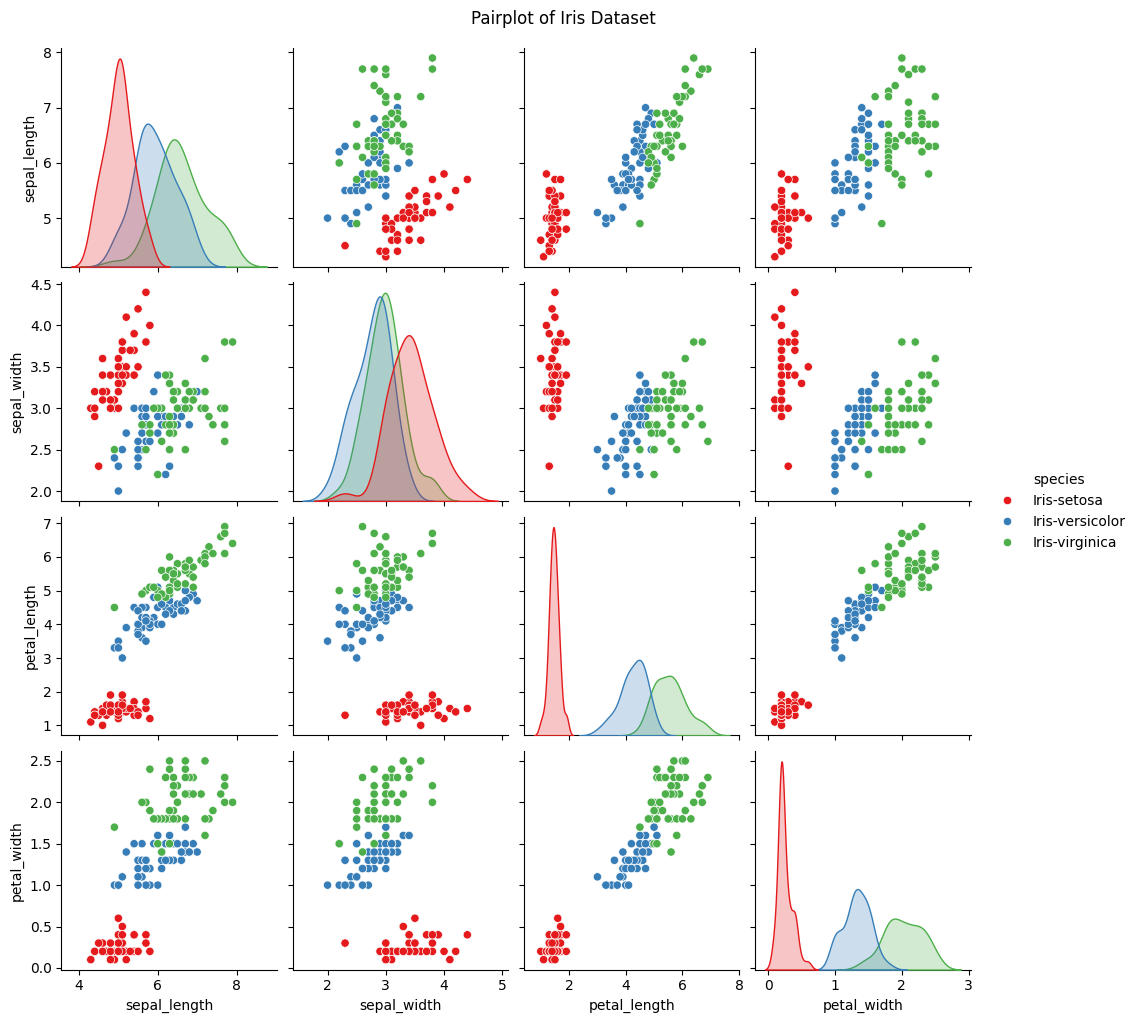

In [ ]:
sns.pairplot(df, hue="species", palette="Set1")     #Uses hue="species" to color points by species.
                                                     #palette="Set1" → chooses a color scheme.

plt.suptitle("Pairplot of Iris Dataset", y=1.02)   #y=1.02 → controls the vertical position of the title.
plt.show()

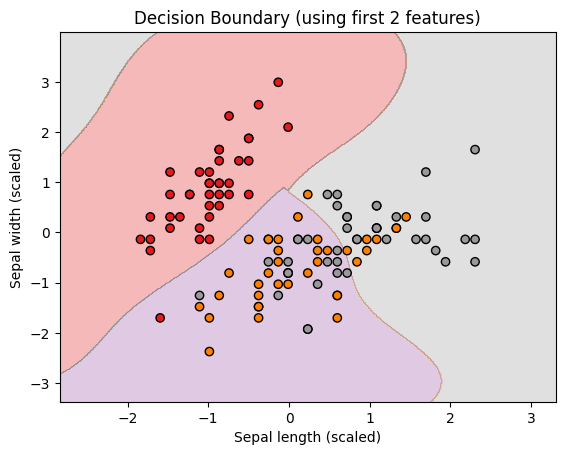

In [ ]:
# Use only first 2 features
X_vis=X_train_scaled[:, :2]

# Train SVM
svm_model_vis=SVC(kernel='rbf')
svm_model_vis.fit(X_vis, y_train)

# Create mesh grid
x_min, x_max=X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max=X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy=np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict class for each grid point
Z=svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert Z (string labels) to numeric for contourf
le=LabelEncoder()
le.fit(y_train)        # Fit encoder on training labels
Z_numeric=le.transform(Z)
Z_numeric=Z_numeric.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap=plt.cm.Set1)

# Convert training labels to numeric for scatter
y_numeric=le.transform(y_train)

plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_numeric, edgecolors="k", cmap=plt.cm.Set1)
plt.title("Decision Boundary (using first 2 features)")
plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.show()

In [ ]:
import pickle

pickle.dump((svm, scaler), open('trained_model.pkl', 'wb'))


In [ ]:
with open('trained_model.sav', 'wb') as f:
    pickle.dump((svm, scaler), f)

In [ ]:
sample = np.array([[5.5, 3.0, 4.2, 1.3]])   
prediction = svm.predict(sample)
print(f"Prediction for [5.5, 3.0, 4.2, 1.3]: {prediction[0]}")


Prediction for [5.5, 3.0, 4.2, 1.3]: Iris-virginica
